In [ ]:
pip install boruta

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.describe().T)  #Values need to be normalized before fitting.


                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
print(df.isnull().sum())
#df = df.dropna()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#df = df.dropna()
#print(df.isnull().sum())

<Axes: xlabel='diagnosis', ylabel='count'>

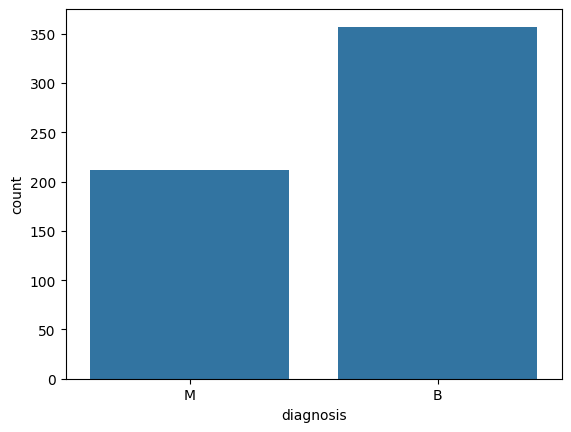

In [ ]:
#Understand the data
sns.countplot(x= "diagnosis", data=df)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
categories = { "B": 0, "M":1}
df['diagnosis'] = df['diagnosis'].replace(categories)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = df.drop(labels = ["diagnosis", "id", "Unnamed: 32"], axis=1)
y = df["diagnosis"].values


In [ ]:
feature_names = np.array(X.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
##Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [ ]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

In [ ]:
# find all relevant features
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	16
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	

BorutaPy(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None, device=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=None,
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 multi_strategy=None, n_estimators=46,
                                 n_jobs=None, num_parallel_tree=None,
                                 random_state=1137204482, ...),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7AC801B42F40, verbose=2)

In [ ]:
# check selected features
print(feat_selector.support_)

[False  True False False False False False  True False False False False
  True False False False  True False False False  True  True  True  True
 False False False  True False False]


In [ ]:
# check ranking of features
print(feat_selector.ranking_)

[ 7  1 22  3 14 11 18  1 16 17  4  7  1  7 13 10  1 19 12  4  1  1  1  1
  9 20  2  1 14 20]


In [ ]:

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)

In [ ]:
# zip feature names, ranks, and decisions
feature_ranks = list(zip(feature_names,
                         feat_selector.ranking_,
                         feat_selector.support_))

# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: radius_mean                    Rank: 7,  Keep: False
Feature: texture_mean                   Rank: 1,  Keep: True
Feature: perimeter_mean                 Rank: 22,  Keep: False
Feature: area_mean                      Rank: 3,  Keep: False
Feature: smoothness_mean                Rank: 14,  Keep: False
Feature: compactness_mean               Rank: 11,  Keep: False
Feature: concavity_mean                 Rank: 18,  Keep: False
Feature: concave points_mean            Rank: 1,  Keep: True
Feature: symmetry_mean                  Rank: 16,  Keep: False
Feature: fractal_dimension_mean         Rank: 17,  Keep: False
Feature: radius_se                      Rank: 4,  Keep: False
Feature: texture_se                     Rank: 7,  Keep: False
Feature: perimeter_se                   Rank: 1,  Keep: True
Feature: area_se                        Rank: 7,  Keep: False
Feature: smoothness_se                  Rank: 13,  Keep: False
Feature: compactness_se                 Rank: 10,  Keep: False
Fea

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_filtered, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_xgb = xgb_model.predict(X_test_filtered)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_xgb))

Accuracy =  0.958041958041958


<Axes: >

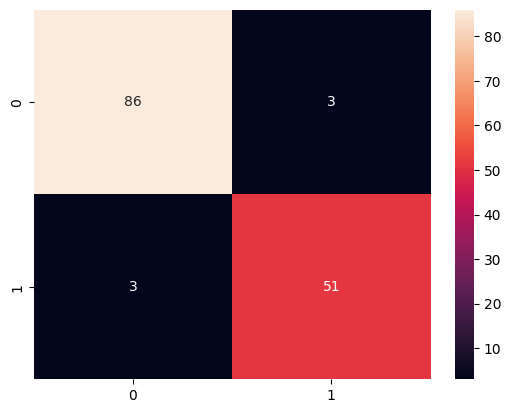

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_xgb)
#print(cm)
sns.heatmap(cm, annot=True)